# Just for Funzies 

In [264]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import seaborn as sns
sns.set(rc={'figure.figsize':(10,10)}) 

import warnings
warnings.simplefilter("ignore")

%matplotlib inline 

from sklearn.preprocessing import LabelEncoder 
from sklearn.metrics import SCORERS
import re

import nltk 
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from nltk.sentiment.vader import SentimentIntensityAnalyzer

## World Map

In [5]:
from googletrans import Translator, constants
from pprint import pprint
from google_trans_new import google_translator  

In [6]:
#!pip install googletrans==3.1.0a0

In [7]:
translator = Translator()  
def googTrans(txt):
    try:
        translation = translator.translate(txt,lang_tgt='en')
        return translation.text
    except:
        return txt

In [8]:
def get_continent_Code(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_a2_code

def get_continent_Cont(col):
    try:
        cn_a2_code =  country_name_to_country_alpha2(col)
    except:
        cn_a2_code = 'Unknown' 
    try:
        cn_continent = country_alpha2_to_continent_code(cn_a2_code)
    except:
        cn_continent = 'Unknown' 
    return cn_continent

In [9]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent = "my_application")
def geolocate_Lat(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.latitude
    except:
        # Return missing value
        return np.nan
    
def geolocate_Long(country):
    try:
        # Geolocate the center of the country
        loc = geolocator.geocode(country)
        # And return latitude and longitude
        return loc.longitude
    except:
        # Return missing value
        return np.nan

In [118]:
data = pd.read_csv("cybersec_processed.csv").drop('Unnamed: 0', axis = 1)
data.head()

,user_id,status_id,created_at,screen_name,text,source,display_text_width,reply_to_status_id,reply_to_user_id,reply_to_screen_name,...,account_created_at,verified,profile_url,profile_expanded_url,account_lang,profile_banner_url,profile_background_url,profile_image_url,day_post_created,year_account_created
0,x109082290,x1404488925935177737,2021-06-14 17:20:28,NcsVentures,sign cause solution network data breach cyber...,WordPress.com,109,NaN,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,14.0,2010.0
1,x109082290,x1403635112613494786,2021-06-12 08:47:43,NcsVentures,battling chinese big tech encroachment india ...,WordPress.com,103,NaN,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,12.0,2010.0
2,x109082290,x1403747937818120198,2021-06-12 16:16:03,NcsVentures,ask dr jeanette success way devil choke chain ...,WordPress.com,226,NaN,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,12.0,2010.0
3,x109082290,x1404021845913899009,2021-06-13 10:24:28,NcsVentures,threat digital pakistan cyberattack,WordPress.com,89,NaN,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,13.0,2010.0
4,x109082290,x1404053089804554241,2021-06-13 12:28:37,NcsVentures,pakistan attack news pakistan army claim major...,WordPress.com,152,NaN,NaN,NaN,...,2010-01-27 22:48:24,False,https://t.co/E0XpJWVD52,http://www.nationalcybersecurity.com/,NaN,https://pbs.twimg.com/profile_banners/10908229...,http://abs.twimg.com/images/themes/theme15/bg.png,http://pbs.twimg.com/profile_images/715854922/...,13.0,2010.0


In [340]:
countries = data[['country', 'text']]

In [341]:
# replacing countries for country code function
countries.country = countries.country.replace('Algérie / ⵍⵣⵣⴰⵢⴻⵔ / الجزائر', 'Algeria')
countries.country = countries.country.replace("لبنان", 'Lebanon')
countries.country = countries.country.replace("Deutschland", 'Germany')
countries.country = countries.country.replace("Schweiz/Suisse/Svizzera/Svizra", 'Switzerland')
countries.country = countries.country.replace("België / Belgique / Belgien", 'Belgium')
countries.country = countries.country.replace("Shqipëria", 'Albania')
countries.country = countries.country.replace("Azərbaycan", 'Azerbaijan')
countries.country = countries.country.replace("Bosna i Hercegovina / Босна и Херцеговина", 'Bosnia and Herzegovina')
countries.country = countries.country.replace("Danmark", 'Denmark')
countries.country = countries.country.replace("España", 'Spain')
countries.country = countries.country.replace("Madagasikara", 'Madagascar')
countries.country = countries.country.replace("Sverige", 'Sweden')
countries.country = countries.country.replace("Suomi / Finland", 'Finland')
countries.country = countries.country.replace("Türkiye", 'Turkey')
countries.country = countries.country.replace("Palestinian Territory", 'Palestine')
countries.country = countries.country.replace('Bolivia', 'Bolivia')
countries.country = countries.country.replace('Cameroun', 'Cameroon')
countries.country = countries.country.replace('Eesti', 'Estonia')
countries.country = countries.country.replace('Italia', 'Italy')
countries.country = countries.country.replace('Lietuva', 'Lithuania')
countries.country = countries.country.replace('Lëtzebuerg', 'Luxembourg')
countries.country = countries.country.replace('Magyarország', 'Hungary')
countries.country = countries.country.replace('Maroc / ⵍⵎⵖⵔⵉⴱ / المغرب', 'Morocco')
countries.country = countries.country.replace('México', 'Mexico')
countries.country = countries.country.replace('Nederland', 'Netherlands')
countries.country = countries.country.replace('New Zealand / Aotearoa', 'New Zealand')
countries.country = countries.country.replace('Panamá', 'Panama')
countries.country = countries.country.replace('Kosova / Kosovo', 'Kosovo')
countries.country = countries.country.replace('Brasil', 'Brazil')
countries.country = countries.country.replace('Norge', 'Norway')
countries.country = countries.country.replace('Oʻzbekiston', 'Uzbekistan')
countries.country = countries.country.replace('Perú', 'Peru')
countries.country = countries.country.replace('Polska', 'Poland')
countries.country = countries.country.replace('República Dominicana', 'Dominican Republic')
countries.country = countries.country.replace('România', 'Romania')
countries.country = countries.country.replace('Slovenija', 'Slovenia')
countries.country = countries.country.replace('Slovensko', 'Slovakia')
countries.country = countries.country.replace('Sāmoa', 'Samoa')
countries.country = countries.country.replace('Tchad تشاد', 'Chad')
countries.country = countries.country.replace('Việt Nam', 'Viet Nam')
countries.country = countries.country.replace('Éire / Ireland', 'Ireland')
countries.country = countries.country.replace('Ísland', 'Iceland')
countries.country = countries.country.replace('Österreich', 'Austria')
countries.country = countries.country.replace('Česko', 'Czechia')
countries.country = countries.country.replace('Ελλάς', 'Greece')
countries.country = countries.country.replace('Κύπρος - Kıbrıs', 'Cyprus')
countries.country = countries.country.replace('Беларусь', 'Belarus')
countries.country = countries.country.replace('Бългaрия', 'Bulgaria')
countries.country = countries.country.replace('Россия', 'Russia')
countries.country = countries.country.replace('Северна Македонија', 'North Macedonia')
countries.country = countries.country.replace('Србија', 'Serbia')
countries.country = countries.country.replace('Україна', 'Ukraine')
countries.country = countries.country.replace('Հայաստան', 'Armenia')
countries.country = countries.country.replace('الأردن', 'Jordan')
countries.country = countries.country.replace('أوروبا', 'Europe')
countries.country = countries.country.replace('ישראל', 'Israel')
countries.country = countries.country.replace('السعودية', 'Saudi Arabia')
countries.country = countries.country.replace('البحرين', 'Bahrain')
countries.country = countries.country.replace('الإمارات العربية المتحدة', 'United Arab Emirates')
countries.country = countries.country.replace('سوريا', 'Syria')
countries.country = countries.country.replace('تونس', 'Tunisia')
countries.country = countries.country.replace('ایران', 'Iran')
countries.country = countries.country.replace('اليمن', 'Yemen')
countries.country = countries.country.replace('الكويت', 'Kuwait')
countries.country = countries.country.replace('العراق / عێراق', 'Iraq')
countries.country = countries.country.replace('ދިވެހިރާއްޖެ', 'Maldives')
countries.country = countries.country.replace('پاکستان', 'Pakistan')
countries.country = countries.country.replace('مصر', 'Egypt')
countries.country = countries.country.replace('ليبيا', 'Libya')
countries.country = countries.country.replace('قطر', 'Qatar')
countries.country = countries.country.replace('عمان', 'Oman')
countries.country = countries.country.replace('नेपाल', 'Nepal')
countries.country = countries.country.replace('বাংলাদেশ', 'Bangladesh')
countries.country = countries.country.replace('ประเทศไทย', 'Thailand')
countries.country = countries.country.replace('საქართველო', 'Georgia')
countries.country = countries.country.replace('ኢትዮጵያ', 'Ethiopia')
countries.country = countries.country.replace('日本', 'Japan')
countries.country = countries.country.replace('臺灣', 'Taiwan')
countries.country = countries.country.replace('龙虬庄文化', 'China')
countries.country = countries.country.replace('대한민국', 'South Korea')
countries.country = countries.country.replace('조선민주주의인민공화국', 'North Korea')

In [312]:
text = countries.copy()

### Map Indicating Where People Are

In [342]:
%%time
countries['count'] = 1
countries = countries.groupby('country').sum('count').reset_index()
#countries['country'] = countries['country'].apply(googTrans)
countries.head()

CPU times: user 8.74 ms, sys: 1.93 ms, total: 10.7 ms
Wall time: 8.98 ms


,country,count
0,Africa,7
1,Albania,4
2,Algeria,3
3,Argentina,13
4,Armenia,2


In [343]:
countries['user_percents'] = countries['count'].apply(lambda x: x/sum(countries['count']))
countries.head()

,country,count,user_percents
0,Africa,7,0.000396
1,Albania,4,0.000227
2,Algeria,3,0.000170
3,Argentina,13,0.000736
4,Armenia,2,0.000113


In [344]:
#function to convert to alpah2 country codes and continents
from pycountry_convert import country_alpha2_to_continent_code, country_name_to_country_alpha2

In [345]:
%%time
#countries['codes'] = countries['country'].apply(get_continent_Code)
countries['continent'] = countries['country'].apply(get_continent_Cont)

CPU times: user 1.55 ms, sys: 104 µs, total: 1.66 ms
Wall time: 1.58 ms


In [346]:
%%time
countries['longitude'] = countries['country'].apply(geolocate_Long)
countries['latitude'] = countries['country'].apply(geolocate_Lat)

CPU times: user 883 ms, sys: 93.9 ms, total: 977 ms
Wall time: 2min 23s


In [347]:
countries.head()

,country,count,user_percents,continent,longitude,latitude
0,Africa,7,0.000396,Unknown,17.757812,11.502434
1,Albania,4,0.000227,EU,19.999962,41.000028
2,Algeria,3,0.000170,AF,2.999983,28.000027
3,Argentina,13,0.000736,SA,-64.967282,-34.996496
4,Armenia,2,0.000113,AS,44.673665,40.769627


In [361]:
countries = countries.dropna(subset=['longitude', 'latitude'])
countries.isna().sum()

country          0
count            0
user_percents    0
continent        0
longitude        0
latitude         0
CODE             0
dtype: int64

In [362]:
#!pip install folium

In [363]:
# Create a world map to show distributions of users 
import folium
from folium.plugins import MarkerCluster

In [364]:
#empty map
world_map= folium.Map(tiles="cartodbpositron")
marker_cluster = MarkerCluster().add_to(world_map)

In [374]:
#for each coordinate, create circlemarker of user percent
for i in range(len(countries)):
        lat = countries.iloc[i]['latitude']
        long = countries.iloc[i]['longitude']
        radius=5
        popup_text = """Country : {}<br>
                    %of Users : {}<br>"""
        popup_text = popup_text.format(countries.iloc[i]['country'],
                                   countries.iloc[i]['count']
                                   )
        folium.CircleMarker(location = [lat, long], radius=radius, popup= popup_text, fill =True).add_to(marker_cluster)
#show the map
world_map

# this is not a frequency map. It just shows where people are

### Frequency Map

In [353]:
# generate country code  based on country name 
import pycountry 
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
           # .alpha_3 means 3-letter country code 
           # .alpha_2 means 2-letter country code
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE
# create a column for code 
countries['CODE']=alpha3code(countries.country)
countries.head()

,country,count,user_percents,continent,longitude,latitude,CODE
0,Africa,7,0.000396,Unknown,17.757812,11.502434,None
1,Albania,4,0.000227,EU,19.999962,41.000028,ALB
2,Algeria,3,0.000170,AF,2.999983,28.000027,DZA
3,Argentina,13,0.000736,SA,-64.967282,-34.996496,ARG
4,Armenia,2,0.000113,AS,44.673665,40.769627,ARM


In [354]:
# manually adding countries that are still None
countries['CODE'][14] = 'BOL'
countries['CODE'][50] = 'IRN'
countries['CODE'][80] = 'PKR'
countries['CODE'][104] = 'KOR'
countries['CODE'][94] = 'RUS'
countries['CODE'][112] = 'TZA'
countries['CODE'][114] = 'BHS'
countries['CODE'][85] = 'PSE'
countries['CODE'][111] = 'TWN'
countries['CODE'][110] = 'SYR'
countries['CODE'][127] = 'VEN'
countries['CODE'][129] = 'PHL'
countries['CODE'][59] = 'XXK'

In [355]:
countries[countries.CODE == "None"].country.unique()

array(['Africa', 'Asia', 'Europe', 'Global', 'North America', 'Unknown',
       'Viti',
       'https://twitter.com/phoneguymark/status/1404431952334233600',
       'https://twitter.com/phoneguymark/status/1404444543026667526',
       'https://twitter.com/phoneguymark/status/1404457868108173312',
       'https://twitter.com/phoneguymark/status/1404462150085758980',
       'https://twitter.com/phoneguymark/status/1404463845813465104',
       'https://twitter.com/phoneguymark/status/1404467433579102214',
       'https://twitter.com/phoneguymark/status/1404470827383504902',
       'https://twitter.com/phoneguymark/status/1404473254715211776',
       'ශ්\u200dරී ලංකාව இலங்கை'], dtype=object)

In [356]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
# rename the columns so that we can merge with our data
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']
world.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [357]:
# then merge with our data 
merge=pd.merge(world,countries,how="left",on='CODE')
merge.head()

,pop_est,continent_x,name,CODE,gdp_md_est,geometry,country,count,user_percents,continent_y,longitude,latitude
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,3.0,0.000170,AF,35.787844,-6.524712
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,449.0,0.025430,NA,-107.991707,61.066692
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,6005.0,0.340111,NA,-100.445882,39.783730


In [358]:
merge.shape

(178, 12)

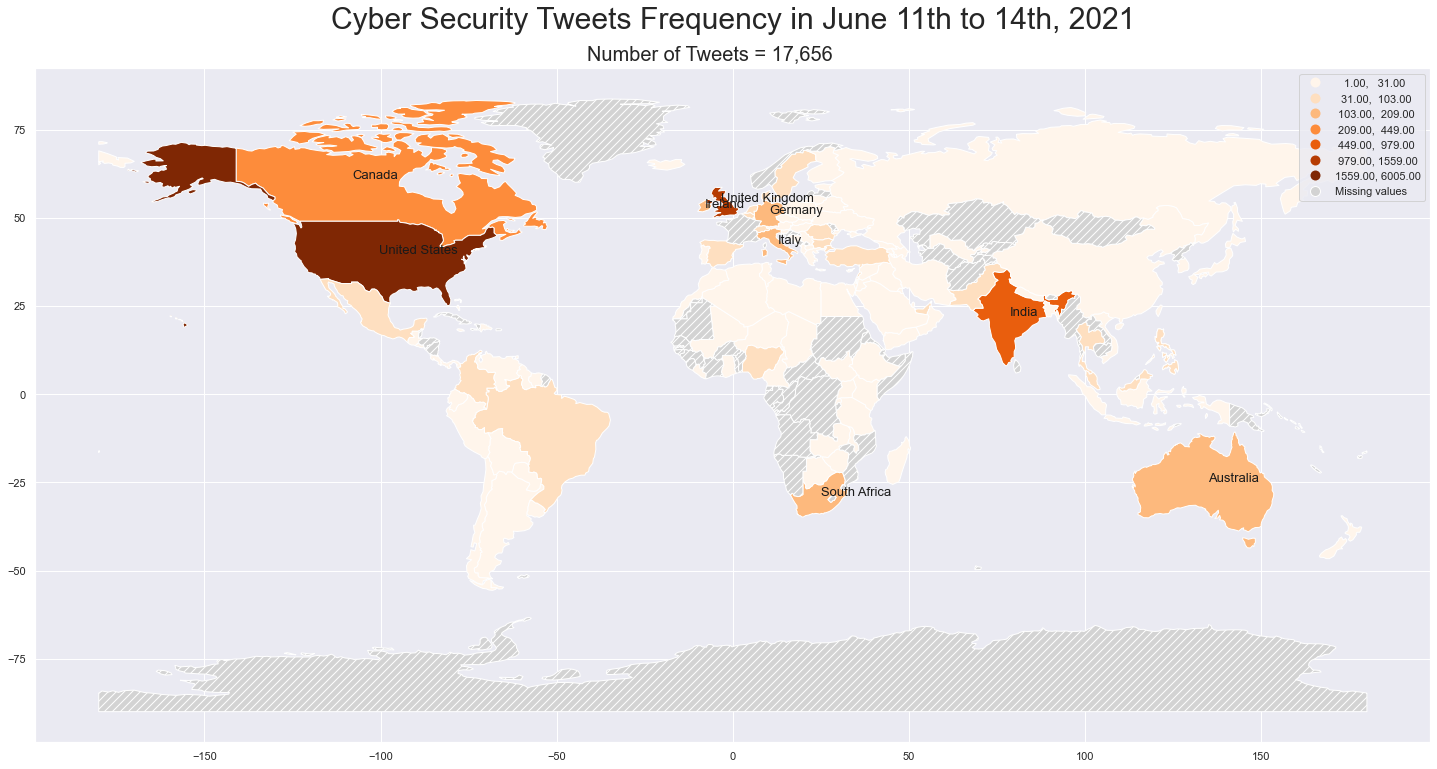

In [360]:
merge.plot(column='count', scheme="naturalbreaks", k = 7,
           figsize=(25, 20),
           legend=True,cmap='Oranges',
          missing_kwds={
          "color": "lightgrey",
          "edgecolor": "white",
          "hatch": "///",
          "label": "Missing values"})
plt.title('Cyber Security Tweets Frequency in June 11th to 14th, 2021',fontsize=30, y = 1.05)
plt.suptitle("Number of Tweets = 17,656", size = 20, y = 0.753)
#plt.legend(fontsize=50)
# add countries names and numbers 
for i in range(len(merge.index)):
    if merge['count'][i] > 103:
        plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}".format(merge.country[i]),size=13, color = "k")
plt.show()
# Georgia is misplaced lol

### Sentiment Map

In [313]:
text.head()

,country,text
0,United States,sign cause solution network data breach cyber...
1,United States,battling chinese big tech encroachment india ...
2,United States,ask dr jeanette success way devil choke chain ...
3,United States,threat digital pakistan cyberattack
4,United States,pakistan attack news pakistan army claim major...


In [314]:
sid = SentimentIntensityAnalyzer()
text['scores'] = text['text'].apply(lambda review: sid.polarity_scores(str(review)))
text['compound']  = text['scores'].apply(lambda score_dict: score_dict['compound'])
#text['comp_score'] = text['compound'].apply(lambda c: 'pos' if c >=0.05 else ('neg' if c <= -0.05 else 'neutral'))
text.head()

,country,text,scores,compound
0,United States,sign cause solution network data breach cyber...,"{'neg': 0.0, 'neu': 0.723, 'pos': 0.277, 'comp...",0.3182
1,United States,battling chinese big tech encroachment india ...,"{'neg': 0.259, 'neu': 0.741, 'pos': 0.0, 'comp...",-0.2732
2,United States,ask dr jeanette success way devil choke chain ...,"{'neg': 0.256, 'neu': 0.55, 'pos': 0.194, 'com...",-0.4404
3,United States,threat digital pakistan cyberattack,"{'neg': 0.531, 'neu': 0.469, 'pos': 0.0, 'comp...",-0.5267
4,United States,pakistan attack news pakistan army claim major...,"{'neg': 0.36, 'neu': 0.64, 'pos': 0.0, 'compou...",-0.7351


In [315]:
text = text.groupby('country').mean('compound').reset_index()
text.head()

,country,compound
0,Africa,0.510500
1,Albania,0.270050
2,Algeria,0.655467
3,Argentina,0.092731
4,Armenia,0.000000


In [316]:
text['CODE']=alpha3code(text.country)
text.head()

,country,compound,CODE
0,Africa,0.510500,None
1,Albania,0.270050,ALB
2,Algeria,0.655467,DZA
3,Argentina,0.092731,ARG
4,Armenia,0.000000,ARM


In [317]:
# manually adding countries that are still None
text['CODE'][14] = 'BOL'
text['CODE'][50] = 'IRN'
text['CODE'][80] = 'PKR'
text['CODE'][104] = 'KOR'
text['CODE'][94] = 'RUS'
text['CODE'][112] = 'TZA'
text['CODE'][114] = 'BHS'
text['CODE'][85] = 'PSE'
text['CODE'][111] = 'TWN'
text['CODE'][110] = 'SYR'
text['CODE'][127] = 'VEN'
text['CODE'][129] = 'PHL'
text['CODE'][59] = 'XXK'

In [318]:
text[text.CODE == 'None'].country.unique()

array(['Africa', 'Asia', 'Europe', 'Global', 'North America', 'Unknown',
       'Viti',
       'https://twitter.com/phoneguymark/status/1404431952334233600',
       'https://twitter.com/phoneguymark/status/1404444543026667526',
       'https://twitter.com/phoneguymark/status/1404457868108173312',
       'https://twitter.com/phoneguymark/status/1404462150085758980',
       'https://twitter.com/phoneguymark/status/1404463845813465104',
       'https://twitter.com/phoneguymark/status/1404467433579102214',
       'https://twitter.com/phoneguymark/status/1404470827383504902',
       'https://twitter.com/phoneguymark/status/1404473254715211776',
       'ශ්\u200dරී ලංකාව இலங்கை'], dtype=object)

In [319]:
%%time
text['longitude'] = text['country'].apply(geolocate_Long)
text['latitude'] = text['country'].apply(geolocate_Lat)

CPU times: user 872 ms, sys: 93.3 ms, total: 965 ms
Wall time: 2min 23s


In [320]:
merge_sent=pd.merge(world,text,how="left",on='CODE')
merge_sent.head()

,pop_est,continent,name,CODE,gdp_md_est,geometry,country,compound,longitude,latitude
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",NaN,NaN,NaN,NaN
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,0.382500,35.787844,-6.524712
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948...",NaN,NaN,NaN,NaN
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,0.054662,-107.991707,61.066692
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,0.059378,-100.445882,39.783730


In [321]:
#merge_sent = merge_sent.fillna(99999)
merge_sent.shape

(178, 10)

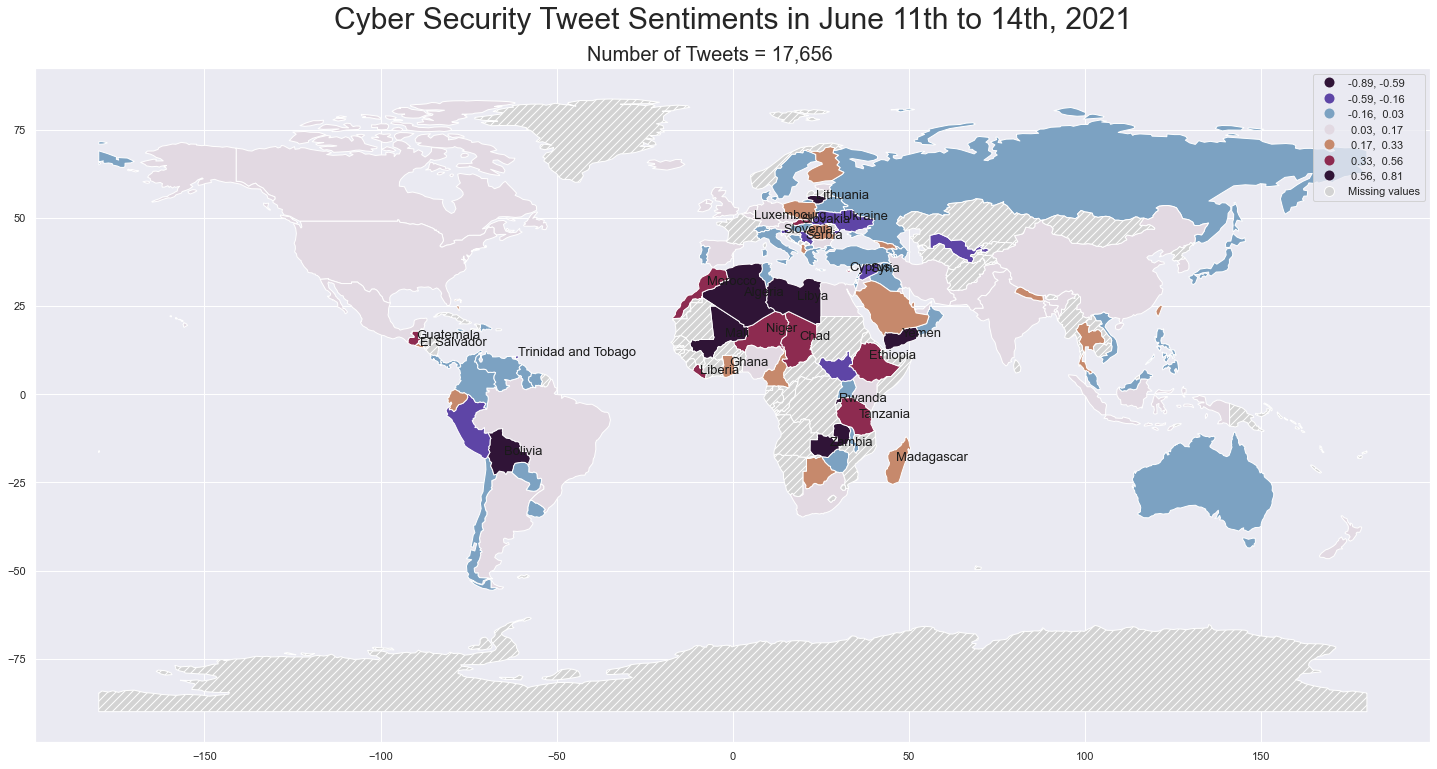

In [373]:
merge_sent.plot(column='compound', scheme="naturalbreaks", k = 7,
           figsize=(25, 20),
           legend=True,cmap='twilight_shifted',
           missing_kwds={
          "color": "lightgrey",
          "edgecolor": "white",
          "hatch": "///",
          "label": "Missing values"})
plt.title('Cyber Security Tweet Sentiments in June 11th to 14th, 2021',fontsize=30, y = 1.05)
plt.suptitle("Number of Tweets = 17,656", size = 20, y = 0.753)
#plt.legend(fontsize=50)
# add countries names and numbers 
for i in range(len(merge_sent.index)):
    if merge_sent.compound[i] > 0.3 or merge_sent.compound[i] < -0.3:
        plt.text(float(merge_sent.longitude[i]),float(merge_sent.latitude[i]),"{}".format(merge_sent.country[i]),size=13, color = "k")
plt.show()

In [369]:
text[text.country == "Canada"]

,country,compound,CODE,longitude,latitude
20,Canada,0.054662,CAN,-107.991707,61.066692


# Time Series

In [ ]:
time_series_com = text[['created_at', "compound"]].set_index('created_at')
time_series_com.head()

In [ ]:
time_series_com = time_series_com.groupby('created_at').mean('compound')
time_series_com.head()

In [ ]:
time_series_com.plot(figsize=(15, 6))
plt.ylim((-1,1))
plt.show()